In [9]:
import pandas as pd
data = pd.read_csv('../submission/data/day_ahead_prices.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              87285 non-null  object 
 1   day_ahead_prices_EURO  87285 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [10]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

data = data.iloc[:168,:]
data.head()

,day_ahead_prices_EURO
timestamp,
2015-01-04 23:00:00+00:00,22.34
2015-01-05 00:00:00+00:00,17.93
2015-01-05 01:00:00+00:00,15.17
2015-01-05 02:00:00+00:00,16.38
2015-01-05 03:00:00+00:00,17.38


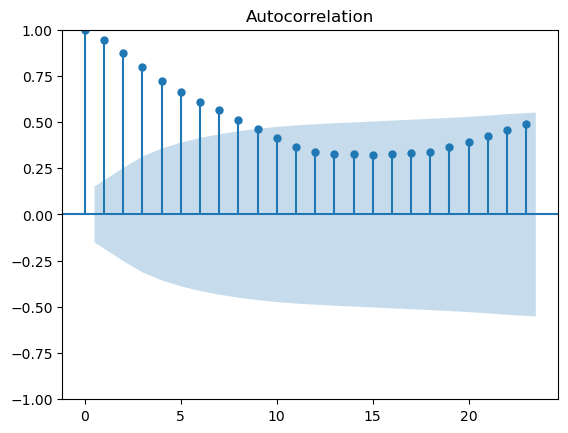

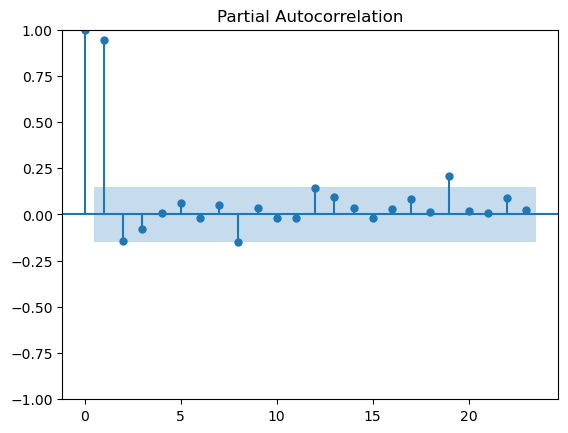

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(data)
plot_pacf(data)
plt.show()

In [12]:
from pmdarima.arima import auto_arima
model = auto_arima(data, seasonal=True, m=24) #m=24 for daily seasonality,m=168 for weekly or m=730(24*365/12) for monthly

In [13]:
model.fit(data)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 24),
      suppress_warnings=True, with_intercept=False)

In [14]:
forecast = model.predict(n_periods=24)

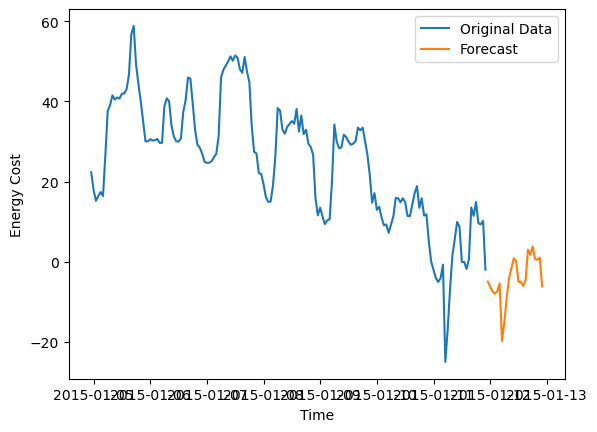

In [15]:
import matplotlib.pyplot as plt

plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Cost')
plt.legend()
plt.show()

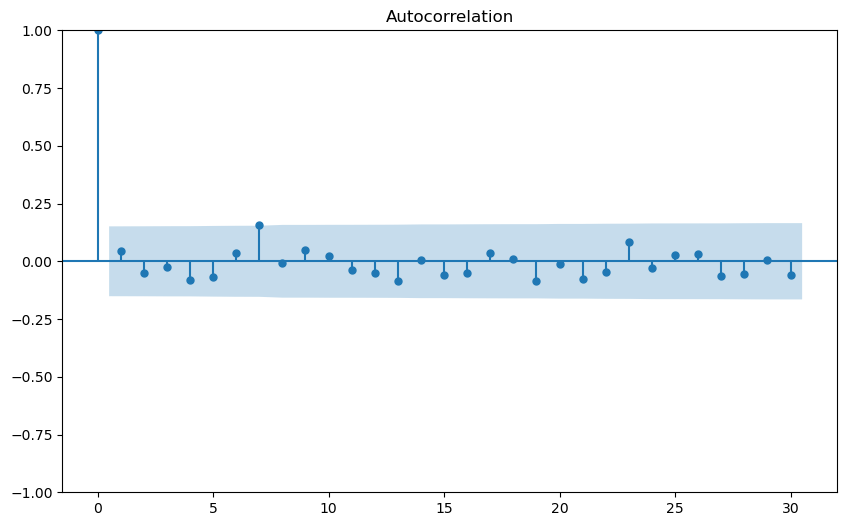

In [16]:
import statsmodels.api as sm

residuals = model.resid()

fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=30, ax=ax)
plt.show()